# PDE's in two dimensions

In [24]:
%matplotlib inline
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Example 1: using custom integrator

Numerical solution of the partial differential equation
\begin{equation*}
\frac{\partial c(x,y,t)}{\partial t} = D \left( \frac{\partial^2 c(x,y,t)}{\partial x^2} + \frac{\partial^2 c(x,y,t)}{\partial y^2} \right)
\end{equation*}
subject to the boundary conditions
\begin{equation*}
c(0,y,t) = 1, \; c(1,y,t) = 1, \; c(x,0,t) = 1,\; c(x,1,t) = 1
\end{equation*}
and the initial condition
\begin{equation}
c(x,y,0) = 0
\end{equation}

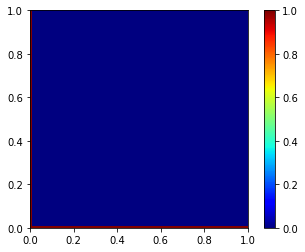

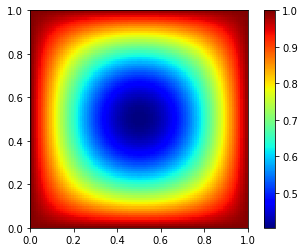

0.19602


In [30]:
N = 100
delta = 1/(N-1)
D = 0.01
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)

# initial condition
c = np.zeros((N,N))

# apply boundary conditions
c[0,:] = 1
c[-1,:] = 1
c[:,0] = 1
c[:,-1] = 1

def rhs(c):
    
    # allocate return argument
    retval = 0*c
    
    # diffusion in x direction
    retval[1:-1,:] += D/delta/delta*(c[:-2,:] -2*c[1:-1,:] + c[2:,:])
    
    # diffusion in y direction
    retval[:,1:-1] += D/delta/delta*(c[:,:-2] -2*c[:,1:-1] + c[:,2:])
    
    return retval

# plot initial condition
plt.pcolor(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()

# integrate using Euler's rule
dt = 0.002
t = 0
tend = 5
while (t<tend):
    c += dt*rhs(c)
    t += dt

# plot final concentration
plt.pcolor(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()

# check stability (von Neumann condition)
# number needs to be less than 0.5
print("%g" % (dt*D/delta/delta))

### Example 2: streamlined version

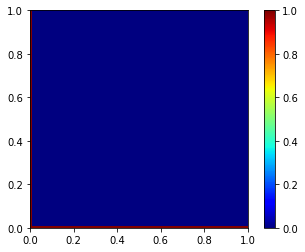

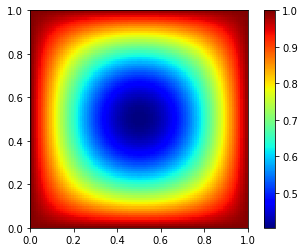

0.19602


In [29]:
N = 100
delta = 1/(N-1)
D = 0.01
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)

# initial condition
c = np.zeros((N,N))

# apply boundary conditions
c[0,:] = 1
c[-1,:] = 1
c[:,0] = 1
c[:,-1] = 1

def rhs(c):
    
    # allocate return argument
    retval = 0*c
    
    # diffusion in x-y direction
    retval[1:-1,1:-1] += D/delta/delta*(c[2:,1:-1] + c[:-2,1:-1] + c[1:-1,2:] + c[1:-1,:-2] - 4*c[1:-1,1:-1])
    
    return retval

# plot initial condition
plt.pcolor(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()

# integrate using Euler's rule
dt = 0.002
t = 0
tend = 5
while (t<tend):
    c += dt*rhs(c)
    t += dt

# plot final concentration
plt.pcolor(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()

# check stability (von Neumann condition)
# number needs to be less than 0.5
print("%g" % (dt*D/delta/delta))

### Using odeint

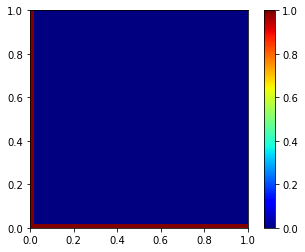

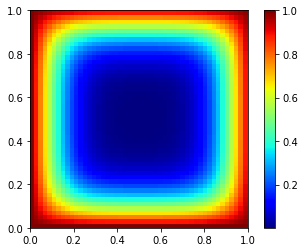

In [70]:
N = 50
delta = 1/(N-1)
D = 0.01
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)

# initial condition
c = np.zeros((N,N))

# apply boundary conditions
c[0,:] = 1
c[-1,:] = 1
c[:,0] = 1
c[:,-1] = 1

def rhs(c,t):
    
    c = c.reshape((N,N))
    retval = 0*c
    # allocate return argument
    
    # diffusion in x-y direction
    retval[1:-1,1:-1] += D/delta/delta*(c[2:,1:-1] + c[:-2,1:-1] + c[1:-1,2:] + c[1:-1,:-2] - 4*c[1:-1,1:-1])
        
    return retval.ravel()

# plot initial condition
plt.pcolormesh(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()

# using odeint
c0 = c.ravel()
t = np.linspace(0,1,10)
c = odeint(rhs,c0,t)

c = c[-1,:].reshape((N,N))


# plot final concentration
plt.pcolor(x,y,c,cmap='jet')
plt.axis('square')
plt.colorbar()
plt.show()
